# **Neural Network from Scratch : 🤖**

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# handle formatting
plt.rcParams["figure.figsize"] = (5, 4)
import warnings
warnings.filterwarnings("ignore")
# to supress the tsensor warnings
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [2]:
# mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load in the data
data = pd.read_csv("/content/drive/MyDrive/NLP_from_scratch/data/clean_weather.csv",
                   index_col = 0)
data.ffill(axis = 0, inplace = True)

data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


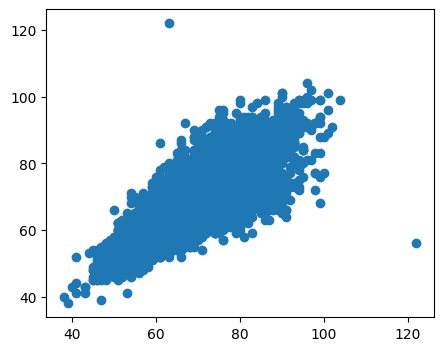

In [ ]:
plt.scatter(data["tmax"], data["tmax_tomorrow"])
plt.show();

In [ ]:
# check the data correlation
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


As we can see that we do not have any feature that has a perfect linear relationship with our data.

Let's plot a actual linear relationship.

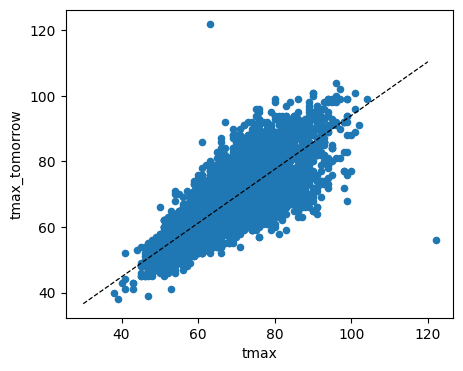

In [ ]:
data.plot.scatter("tmax", "tmax_tomorrow")
prediction = lambda x, w1=.82, b=11.99: x * w1 + b
plt.plot([30, 120], [prediction(30), prediction(120)], c = "black",
         linestyle = "--", linewidth = 0.9)
plt.plot();

In [ ]:
# let's check the baseline mse

mse = lambda y_true, y_pred: np.mean(np.square(y_true - y_pred))

# testing with diffent weights and biases
print(mse(data["tmax"], prediction(data["tmax"])))
print(mse(data["tmax"], prediction(data["tmax"], 0.83)))
print(mse(data["tmax"], prediction(data["tmax"], 0.82, 13)))

2.2574271152564998
2.582750566289143
3.478975349766814


We can see that by tweaking the w, b the error also gets tweaked obviously.

We'll now check how the relationship of tmax changes as tmax_tomorrow changes.

In [ ]:
tmax_bins = pd.cut(data["tmax"], 25)

# actually weight w
ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratios = ratios.groupby(tmax_bins).mean()
binned_ratios[:10]

,0
tmax,
"(37.916, 41.36]",0.773904
"(41.36, 44.72]",0.762256
"(44.72, 48.08]",0.798484
"(48.08, 51.44]",0.805470
"(51.44, 54.8]",0.803930
"(54.8, 58.16]",0.802731
"(58.16, 61.52]",0.812934
"(61.52, 64.88]",0.821545
"(64.88, 68.24]",0.829101


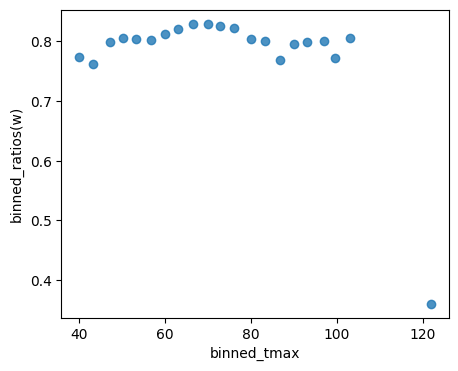

In [ ]:
# let's plot the change
binned_tmax = data["tmax"].groupby(tmax_bins).mean()
binned_ratios = ratios.groupby(tmax_bins).mean()

plt.scatter(binned_tmax, binned_ratios, alpha = 0.8)
plt.xlabel("binned_tmax")
plt.ylabel("binned_ratios(w)")
plt.show();

What a `Neural Network` actually does:
 * is actually based on linear regression itself.
 * implement a non-linear transformation on top of a linear transformation.
 * has multiple layers, which can capture interactions between features.
 * have multiple hidden units, which each have slightly diffrent linear and non-linear transformations.
 * most common non-linear transformation used in neural network is called `ReLU`:
 * ReLU(z) = $max(0, z)$
 * some more functions are :    
 * softplus(x) = $log_e(1 + e^x)$

 * sigmoid(x) = $\frac{1}{1 + e^{-x}}$

 * softmax(x) = $\frac{e^x}{e^x + e^y + \cdots + e^z}$

In [ ]:
# let's visualize these functions

# generate artificial data
z = np.linspace(-50, 50)

# non-linear functions
relu = lambda z: np.maximum(0, z)

softplus = lambda z: np.logaddexp(0, z)

sigmoid = lambda z: 0.5 * (1 + np.tanh(0.5 * z))

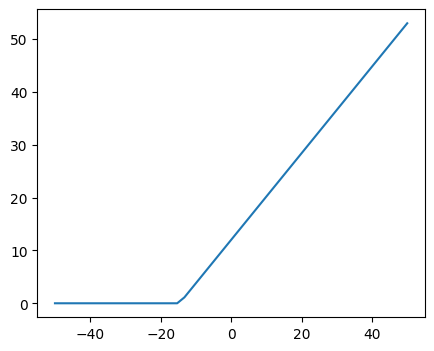

In [ ]:
# plot ReLU

plt.plot(z, relu(prediction(z)))
plt.show();

What we actually did above is that :    
 * we applied a linear transformation using linear regression.
 * then applied a non-linear transformation using those functions.

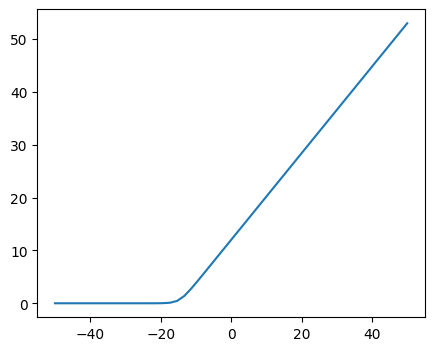

In [ ]:
# plot softplus

plt.plot(z, softplus(prediction(z)))
plt.show();

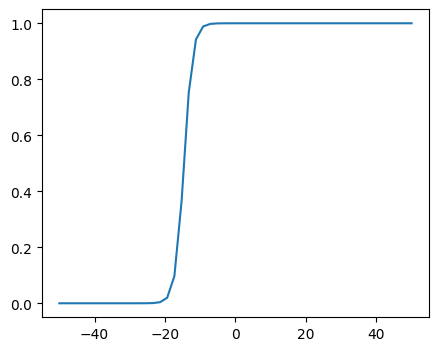

In [ ]:
# plot sigmoid

plt.plot(z, sigmoid(prediction(z)))
plt.show();

This is what actually happens:
$\hat{y} = w_2\;relu(w_1x+b_1)+ b_2$

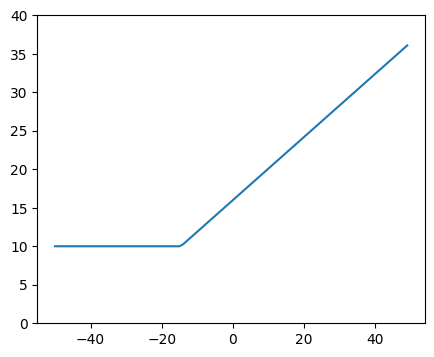

In [ ]:
temps = np.arange(-50, 50)

layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, 0.5, 10)

plt.plot(temps, layer2)
plt.ylim((0, 40))
plt.show();

We have a slight improvement instead of predictig 0 we now predict 10.

To solve our problem of non-linearity we need to add multiple hidden units per layer.

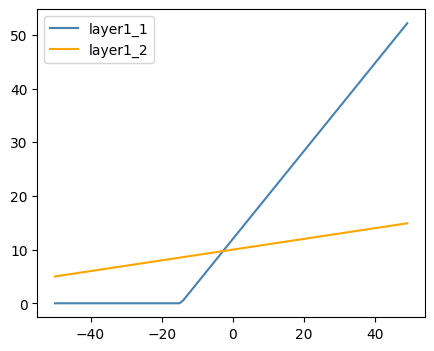

In [ ]:
# adding more units per layer
temps = np.arange(-50, 50)
layer1_1 = np.maximum(0, prediction(temps))
layer1_2 = np.maximum(0, prediction(temps, .1, 10))

plt.plot(temps, layer1_1, c = "steelblue", label = "layer1_1")
plt.plot(temps, layer1_2, c = "orange", label = "layer1_2")

plt.legend()
plt.show();

In [ ]:
layer1_2

array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5,
       11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7,
       13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8,
       14.9])

As we can see that the `ReLU` function does not get's activated in the `layer1_2` since our `weights` and `bias` ensures a output > 0.

Now let's add both units of the layer and plot to see if anything changes?

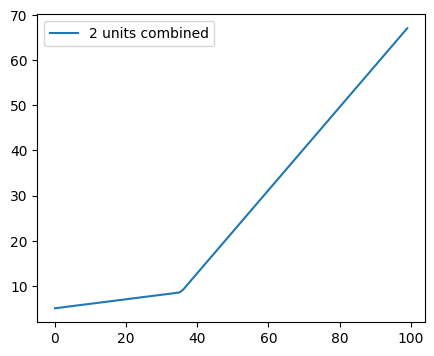

In [ ]:
plt.plot(layer1_1 + layer1_2, label = "2 units combined")
plt.legend()
plt.show();

We can see that we are getting a non-linear relationship here.
But we have not lost the input signal (unlike the case of layer1_2) and if we add a lot more units the algorithm will make it more and more non-linear(curvy).

Let's add another unit with `w = 2` and `b = -50`.

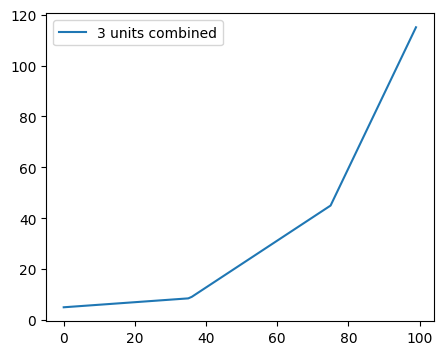

In [ ]:
layer1_3 = np.maximum(0, prediction(temps, 2, -50))

plt.plot(layer1_1 + layer1_2 + layer1_3, label = "3 units combined")
plt.legend()
plt.plot();

So with more units and correct parameters we can actually implement a non-linear line on top of a linear function like linear regression which is the base for our prediction function which should most likely be called as transformation function because all it does it multiply the weight and add in the bias to the input signal and transforms it.

In [ ]:
!pip install tensor-sensor

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
  Created wheel for tensor-sensor: filename=tensor_sensor-1.0-py3-none-any.whl size=26890 sha256=615bacbfe5e32ec4dcfd4dce5f5e136d267ce635ab003d54e70eaee3dfbf1961
  Stored in directory: /root/.cache/pip/wheels/cc/96/59/872b1f1957b3c703a22e0f48e014a9be3f8a1298be6e7974ae
Successfully built tensor-sensor


In [ ]:
import tsensor

input_ = np.array([[80], [90], [100], [-20], [-10]])
l1_weights = np.array([[.82, .1]])
l1_bias = np.array([[11.99, 10]])


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.11/dist-packages/tsensor/analysis.py", line 257, in __enter__
    sys.settrace(self.tracer.listener)



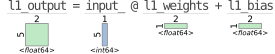


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.11/dist-packages/tsensor/analysis.py", line 265, in __exit__
    sys.settrace(None)



In [ ]:
with tsensor.explain():
  l1_output = input_ @ l1_weights + l1_bias

In [ ]:
input_ @ l1_weights + l1_bias

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [-4.41,  8.  ],
       [ 3.79,  9.  ]])

In [ ]:
l1_output

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [-4.41,  8.  ],
       [ 3.79,  9.  ]])

On top of this we can apply our activation function which is just ReLU.

In [ ]:
l1_activated = np.maximum(0, l1_output)
l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

We set one number to zero after the activation.

$$layer_1 = ReLU(W_1X + b_1)$$
&nbsp;
$$layer_2 = W_2 * ReLU(W_1X + b_1) + b_2 \;\;→ \;\; W_2 * layer_1 + b_2$$

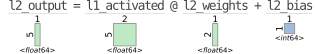

In [ ]:
l2_weights = np.array([[.5], [.2]])
l2_bias = np.array([[5]])

with tsensor.explain():
  l2_output = l1_activated @ l2_weights + l2_bias

In [ ]:
l2_output

array([[47.395],
       [51.695],
       [55.995],
       [ 6.6  ],
       [ 8.695]])

**Forward Pass :**
 * This is called forward pass in neural networks.
 * when we know our weights and biases we pass the inputs through them.
 * to get our predictions just like linear regression.
 * if we don't know how to calculate our weights and biases automatically.
 * the technique becomes non-useful.
 * but we learnt gradient descent on our last rodeo 😁.

In [ ]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [ ]:
def mse(y_true, y_pred):
  return np.square(y_true - y_pred)

In [ ]:
mse(tmax_tomorrow, l2_output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [ 313.113025]])

In [ ]:
def mse_gradient(y_true, y_pred):
  return (2 / y_true.shape[0]) * (y_pred - y_true)

`mse_gradient()` tells us how much to adjust our prediction.
It is actually the gradient of our loss.

In [ ]:
mse_gradient(tmax_tomorrow, l2_output)

array([[-14.242],
       [-14.922],
       [-15.602],
       [ 11.44 ],
       [  7.078]])

In [ ]:
# test code

output_gradient = mse_gradient(tmax_tomorrow, l2_output)

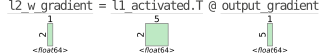

array([[-3824.80152],
       [ -696.692  ]])

In [ ]:
with tsensor.explain():
  l2_w_gradient = l1_activated.T @ output_gradient

l2_w_gradient

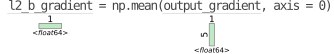

array([-5.2496])

In [ ]:
with tsensor.explain():
  l2_b_gradient = np.mean(output_gradient, axis = 0)

l2_b_gradient

In [ ]:
# test code
lr = 1e-5
l2_weights, l2_bias

(array([[0.5],
        [0.2]]),
 array([[5]]))

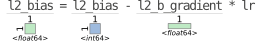

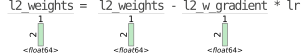

In [ ]:
with tsensor.explain():
  l2_bias = l2_bias - l2_b_gradient * lr
  l2_weights =  l2_weights - l2_w_gradient * lr

In [ ]:
l2_weights, l2_bias

(array([[0.53824802],
        [0.20696692]]),
 array([[5.0000525]]))

### **Calculate Layer 1 Gradient :**

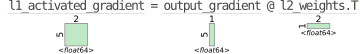

array([[-7.66572823, -2.94762287],
       [-8.03173688, -3.08836038],
       [-8.39774553, -3.22909789],
       [ 6.15755729,  2.36770156],
       [ 3.80971945,  1.46491186]])

In [ ]:
with tsensor.explain():
  l1_activated_gradient = output_gradient @ l2_weights.T
l1_activated_gradient

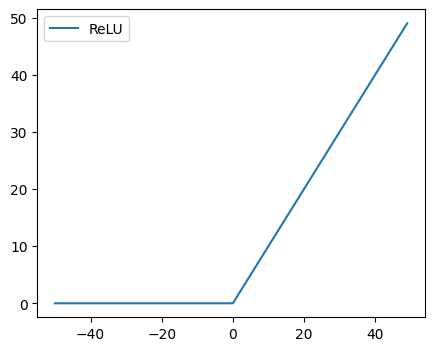

In [ ]:
temps = np.arange(-50, 50)
plt.plot(temps, np.maximum(0, temps), label = "ReLU")
plt.legend()
plt.show();

Here the slope of the ReLU function is 0 or 1, means the gradient is 0 or 1.

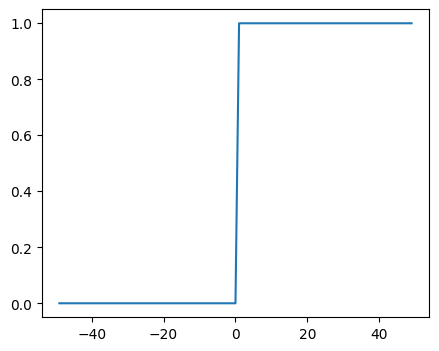

In [ ]:
activation = np.maximum(0, temps)

plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])
plt.show();

**Note :** Derivative of the ReLU function is the Unit Step Function (np.heaviside)

$$\frac{d}{dx} \, \text{ReLU}(x) = H(x)$$

**Unit Step Function :**
$$H(x) =
\begin{cases}
0 & \text{if } x < 0 \\
h_0 & \text{if } x = 0 \\
1 & \text{if } x > 0
\end{cases}
$$

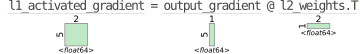

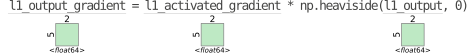

array([[-7.66572823, -2.94762287],
       [-8.03173688, -3.08836038],
       [-8.39774553, -3.22909789],
       [ 0.        ,  2.36770156],
       [ 3.80971945,  1.46491186]])

In [ ]:
# in order to get the l1_output_gradient multiply
# activated gradient with it's derivative for relu its heaviside(step function)

with tsensor.explain():
  l1_activated_gradient = output_gradient @ l2_weights.T
  l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

In [ ]:
# back propagation instance
l1_w_gradient = input_.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient)

# gradient descent instance
l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

# updated weights and biases
l1_weights, l1_bias

(array([[0.84213986, 0.10898675]]), array([[11.99002572, 10.00002572]]))

### **Rough Algorithm We Followed Up Until Now :**

1. Run the network forward pass, and get the output.
2. Compute gradient w.r.t the outputs of the network. (`mse_gradient()`)
3. For each layer in the network:
  * Compute the gradient with respect to the pre-nonlinearity output (if layer has non-linearity).
  * Compute the gradient with respect to the weights.
  * Compute the gradient with respect to the biases.
  * Compute the gradient with respect to the inputs of the layers.
4. Update the parameters in the network using gradient descent.



### **Batch Size :**

1. Number of input rows we feed to the neural network at once to update parameters on.
2. The larger the batch size the faster the network process all the data.
3. The larger the batch size the less effective it makes the gradient descent algorithm beacause in the end it gives less epochs to update/ descend the parameters.
4. In our example we pass 5 rows at a time making our batch_size = 5.

In [ ]:
# implement the training algorithm

# necessary imports
import numpy as np
from sklearn.preprocessing import StandardScaler

# constants
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# transformations
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# splitting data into 3 sets
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(),
            d[[TARGET]].to_numpy()] for d in split_data]

In [ ]:
# initialize the layers

def init_layers(inputs):
  layers = []
  np.random.seed(42)
  for i in range(1, len(inputs)):
    layers.append([
        np.random.rand(inputs[i-1], inputs[i]) / 5 - .1, # range(-0.1, 0.1)
        np.ones((1, inputs[i]))
    ])
  return layers

layers_conf = [3, 10, 10, 1]

layers = init_layers(layers_conf)

In [ ]:
for w, b in layers:
  print(w.shape)
  print(b.shape)
  print()

(3, 10)
(1, 10)

(10, 10)
(1, 10)

(10, 1)
(1, 1)



In [ ]:
# impelemnt the forward pass of the nn

def forward(batch, layers):
  hidden = [batch.copy()]
  for i in range(len(layers)):
    batch = np.matmul(batch, layers[i][0]) + layers[i][1]
    if i < len(layers) - 1:
      batch = np.maximum(0, batch)
    hidden.append(batch.copy())
  return batch, hidden

In [ ]:
# implement loss function of nn

def mse(y_true, y_pred):
  return np.square(y_true - y_pred)

def mse_gradient(y_true, y_pred):
  return (2 / y_true.shape[0]) * (y_pred - y_true)

In [ ]:
# implement the backward pass function of nn

def backward(layers, hidden, grad, lr):
  for i in range(len(layers)-1, -1, -1):
    if i != len(layers)-1:
      # undo the relu function
      grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

    w_grad = hidden[i].T @ grad
    b_grad = np.mean(grad, axis = 0)

    layers[i][0] -= w_grad * lr
    layers[i][1] -= b_grad * lr

    grad = grad @ layers[i][0].T

  return layers

In [ ]:
# implement the training loop

lr = 1e-4
epochs = 200
batch_size = 8
# for verbose
n = epochs - 1

input_dim = train_x.shape[1]

# simple 1 Hidden layer
layers_conf = [input_dim, 32, 1]  # input: 32 → hidden: 64 → output: 1
# deep 2 hidden layer
# layers_conf = [input_dim, 128, 64, 1]  # input: 32 → 128 → 64 → 1
# deeper 3 hidden layers
# layers_conf = [input_dim, 256, 128, 64, 1]


layers = init_layers(layers_conf)

print("Training Neural Network :")

for epoch in range(epochs):
  epoch_loss = []

  for i in range(0, train_x.shape[0], batch_size):
    # initialize the batch
    x_batch = train_x[i : (i + batch_size)]
    y_batch = train_y[i : (i + batch_size)]

    # make predictions using existing parameters
    pred, hidden = forward(x_batch, layers)

    # calculate the loss and gradient
    loss_grad = mse_gradient(y_batch, pred)
    epoch_loss.append(np.mean(np.square(y_batch - pred)))

    # update parameters using gradient descent
    layers = backward(layers, hidden, loss_grad, lr)

  # calculate validation loss for verbose
  valid_preds, _ = forward(valid_x, layers)
  valid_loss = np.mean(np.square(valid_y - valid_preds))

  # learning rate decay
  # if epoch % 5 == 0:
  #   lr *= 0.9  # decay every 5 epochs

  # verbose
  if epoch % 20 == 0 or epoch == n:
    print(
      f"for epoch {epoch} train loss: "
      f"{np.mean(epoch_loss):.2f}, "
      f"valid loss: {valid_loss:.2f}"
    )


Training Neural Network :
for epoch 0 train loss: 262.95, valid loss: 20.68
for epoch 20 train loss: 21.98, valid loss: 20.62
for epoch 40 train loss: 21.96, valid loss: 20.59
for epoch 60 train loss: 21.94, valid loss: 20.58
for epoch 80 train loss: 21.92, valid loss: 20.58
for epoch 100 train loss: 21.91, valid loss: 20.58
for epoch 120 train loss: 21.91, valid loss: 20.58
for epoch 140 train loss: 21.91, valid loss: 20.58
for epoch 160 train loss: 21.90, valid loss: 20.58
for epoch 180 train loss: 21.90, valid loss: 20.57
for epoch 199 train loss: 21.90, valid loss: 20.57


This is the best we can reach for now.

We are hitting learning limitation here with the data and model architecture.

### **Full Neural Network Code :**

In [ ]:
# implement the training algorithm

# necessary imports
import numpy as np
from sklearn.preprocessing import StandardScaler

# constants
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

# transformations
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# splitting data into 3 sets
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(),
            d[TARGET].to_numpy()] for d in split_data]

# implement the forward pass of the nn
def forward(batch, layers):
  hidden = [batch.copy()]
  for i in range(len(layers)):
    batch = np.matmul(batch, layers[i][0]) + layers[i][1]
    if i < len(layers) - 1:
      batch = np.maximum(0, batch)
    hidden.append(batch.copy())
  return batch, hidden

# implement loss function of nn
def mse(y_true, y_pred):
  return np.square(y_true - y_pred)

def mse_gradient(y_true, y_pred):
  return (2 / y_true.shape[0]) * (y_pred - y_true)

# implement the backward pass function of nn
def backward(layers, hidden, grad, lr):
  for i in range(len(layers)-1, -1, -1):
    if i != len(layers)-1:
      # undo the relu function
      grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

    w_grad = hidden[i].T @ grad
    b_grad = np.mean(grad, axis = 0)

    layers[i][0] -= w_grad * lr
    layers[i][1] -= b_grad * lr

    grad = grad @ layers[i][0].T

  return layers

# implement the training loop

lr = 1e-4
epochs = 200
batch_size = 16
# for verbose
n = epochs - 1

input_dim = train_x.shape[1]

# simple 1 Hidden layer
layers_conf = [input_dim, 32, 1]  # input: 32 → hidden: 64 → output: 1
# deep 2 hidden layer
# layers_conf = [input_dim, 128, 64, 1]  # input: 32 → 128 → 64 → 1
# deeper 3 hidden layers
# layers_conf = [input_dim, 256, 128, 64, 1]


layers = init_layers(layers_conf)

print("Training Neural Network :")

for epoch in range(epochs):
  epoch_loss = []

  for i in range(0, train_x.shape[0], batch_size):
    # initialize the batch
    x_batch = train_x[i : (i + batch_size)]
    y_batch = train_y[i : (i + batch_size)]

    # make predictions using existing parameters
    pred, hidden = forward(x_batch, layers)

    # calculate the loss and gradient
    loss_grad = mse_gradient(y_batch, pred)
    epoch_loss.append(np.mean(np.square(y_batch - pred)))

    # update parameters using gradient descent
    layers = backward(layers, hidden, loss_grad, lr)

  # calculate validation loss for verbose
  valid_preds, _ = forward(valid_x, layers)
  valid_loss = np.mean(np.square(valid_y - valid_preds))

  # learning rate decay
  # if epoch % 5 == 0:
  #   lr *= 0.9  # decay every 5 epochs

  # verbose
  if epoch % 20 == 0 or epoch == n:
    print(
      f"for epoch {epoch} train loss: "
      f"{np.mean(epoch_loss):.2f}, "
      f"valid loss: {valid_loss:.2f}"
    )


Training Neural Network :
for epoch 0 train loss: 533.44, valid loss: 21.46
for epoch 20 train loss: 22.02, valid loss: 20.70
for epoch 40 train loss: 22.00, valid loss: 20.67
for epoch 60 train loss: 21.98, valid loss: 20.66
for epoch 80 train loss: 21.96, valid loss: 20.65
for epoch 100 train loss: 21.95, valid loss: 20.65
for epoch 120 train loss: 21.94, valid loss: 20.64
for epoch 140 train loss: 21.94, valid loss: 20.64
for epoch 160 train loss: 21.93, valid loss: 20.64
for epoch 180 train loss: 21.93, valid loss: 20.65
for epoch 199 train loss: 21.92, valid loss: 20.65


### **More Optimization Techniques :**

* **Learning rate scheduling** (to fine-tune convergence)

* **Regularization** (L2 weight decay to reduce overfitting)

* **Early stopping** (stop when validation loss stops improving)

* **Gradient clipping** (to stabilize training if needed)

* **Batch shuffling** (improves generalization)

* **Experiment with optimizer** (Adam often helps convergence even in regression)

* **Feature engineering & normalization** (we already used standard scaling here)

In [ ]:
# load in the data
data = pd.read_csv("/content/drive/MyDrive/NLP_from_scratch/data/clean_weather.csv",
                   index_col = 0)
data.ffill(axis = 0, inplace = True)

data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [4]:
# more structured

import numpy as np
from sklearn.preprocessing import StandardScaler

PREDICTORS = ['tmax', 'tmin', 'rain']
TARGET = ['tmax_tomorrow']

# split the data
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
train_data, valid_data, test_data = split_data

# transform the features
scaler_x = StandardScaler()
scaler_x.fit(train_data[PREDICTORS])

train_x = scaler_x.transform(train_data[PREDICTORS])
valid_x = scaler_x.transform(valid_data[PREDICTORS])
test_x = scaler_x.transform(test_data[PREDICTORS])

# without scaling y values
train_y = train_data[TARGET].values
valid_y = valid_data[TARGET].values
test_y = test_data[TARGET].values

# parameters(w, b) initialization
def init_layers(layers_conf):
    layers = []
    np.random.seed(42)
    for i in range(1, len(layers_conf)):
        layers.append([
            np.random.rand(layers_conf[i-1], layers_conf[i]) / 5 - 0.1,
            np.ones((1, layers_conf[i]))
        ])
    return layers

# forward pass
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(0, batch)  # ReLU activation
        hidden.append(batch)
    return batch, hidden

# define loss function
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# define the gradient function
def mse_gradient(y_true, y_pred):
    return (2 / y_true.shape[0]) * (y_pred - y_true)

# parameter updation or gradient descent
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))  # ReLU derivative

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0, keepdims=True)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        if i > 0:  # only compute grad for next iteration if not at first layer
            grad = grad @ layers[i][0].T

    return layers

# Training parameters
lr = 1e-4
epochs = 200
batch_size = 16
n = epochs - 1

input_dim = train_x.shape[1]
layers_conf = [input_dim, 32, 1]

layers = init_layers(layers_conf)

print("Training Neural Network:")

for epoch in range(epochs):
    epoch_loss = []
    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i: i+batch_size]
        y_batch = train_y[i: i+batch_size]

        pred, hidden = forward(x_batch, layers)

        grad = mse_gradient(y_batch, pred)

        epoch_loss.append(mse(y_batch, pred))

        layers = backward(layers, hidden, grad, lr)

    valid_preds, _ = forward(valid_x, layers)
    valid_loss = mse(valid_y, valid_preds)

    if epoch % 20 == 0 or epoch == n:
        print(
            f"Epoch {epoch}: "
            f"Train Loss: {np.mean(epoch_loss):.4f}, "
            f"Valid Loss: {valid_loss:.4f}"
        )

Training Neural Network:
Epoch 0: Train Loss: 529.2819, Valid Loss: 21.2002
Epoch 20: Train Loss: 22.0153, Valid Loss: 20.6996
Epoch 40: Train Loss: 21.9979, Valid Loss: 20.6781
Epoch 60: Train Loss: 21.9830, Valid Loss: 20.6672
Epoch 80: Train Loss: 21.9595, Valid Loss: 20.6597
Epoch 100: Train Loss: 21.9475, Valid Loss: 20.6571
Epoch 120: Train Loss: 21.9414, Valid Loss: 20.6564
Epoch 140: Train Loss: 21.9359, Valid Loss: 20.6545
Epoch 160: Train Loss: 21.9309, Valid Loss: 20.6550
Epoch 180: Train Loss: 21.9277, Valid Loss: 20.6545
Epoch 199: Train Loss: 21.9253, Valid Loss: 20.6546


In [15]:
test_preds, _ = forward(test_x, layers)

test_mse = mse(test_y, test_preds)
test_mae = np.mean(np.abs(test_y - test_preds))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

test_r2 = r2_score(test_y, test_preds)

print("\nModel Evaluation on Test Data:")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Model Evaluation on Test Data:
Test MSE: 22.1020
Test MAE: 3.4234
Test R² Score: 0.6846
